*** WORK IN PROGRESS ***

Download the necessary libraries & import data.

Link to data - https://raw.githubusercontent.com/DataSlingers/clustRviz/master/data/authors.rda

In [226]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD

In [227]:
df = pd.read_csv('authors.csv').rename(columns = {'Unnamed: 0': 'Author'})
df

,Author,a,all,also,an,and,any,are,as,at,...,were,what,when,which,who,will,with,would,your,BookID
0,Austen,46,12,0,3,66,9,4,16,13,...,11,7,5,6,8,4,9,1,0,1
1,Austen,35,10,0,7,44,4,3,18,16,...,13,5,7,7,3,5,14,8,0,1
2,Austen,46,2,0,3,40,1,13,11,9,...,6,10,4,6,4,5,15,3,9,1
3,Austen,40,7,0,4,64,3,3,20,13,...,10,3,6,10,5,3,22,4,3,1
4,Austen,29,5,0,6,52,5,14,17,6,...,5,8,4,13,2,4,21,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,Shakespeare,32,4,0,6,33,0,7,8,4,...,1,13,2,3,3,11,17,5,10,12
837,Shakespeare,16,5,0,5,49,1,6,10,3,...,1,6,5,6,0,11,20,2,7,12
838,Shakespeare,22,15,0,3,48,0,9,10,2,...,0,16,2,2,0,12,15,1,10,12
839,Shakespeare,25,4,0,8,59,3,6,7,3,...,4,11,2,2,2,22,23,4,5,12


In [228]:
book_id = df['Author']
book_id.value_counts() # 4 different books ; w/ 317 - Austen, ..., 55 - Milton.
# df[['Author','BookID']].groupby('Author').value_counts()

Author
Austen         317
London         296
Shakespeare    173
Milton          55
Name: count, dtype: int64

- Unsupervised learning: drop columns ['Authors', 'BookID'] and determine patterns with words across chapters using unsupervised learning methods.

- We will later come back to these labels we dropped to validate our results.

- Note, a row represents a book chapter with each column representing the word counts of key words in that chapter.

In [229]:
X = df.copy().drop(['Author','BookID'], axis=1)
X

,a,all,also,an,and,any,are,as,at,be,...,was,were,what,when,which,who,will,with,would,your
0,46,12,0,3,66,9,4,16,13,13,...,40,11,7,5,6,8,4,9,1,0
1,35,10,0,7,44,4,3,18,16,9,...,27,13,5,7,7,3,5,14,8,0
2,46,2,0,3,40,1,13,11,9,23,...,24,6,10,4,6,4,5,15,3,9
3,40,7,0,4,64,3,3,20,13,20,...,26,10,3,6,10,5,3,22,4,3
4,29,5,0,6,52,5,14,17,6,16,...,23,5,8,4,13,2,4,21,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,32,4,0,6,33,0,7,8,4,18,...,0,1,13,2,3,3,11,17,5,10
837,16,5,0,5,49,1,6,10,3,24,...,1,1,6,5,6,0,11,20,2,7
838,22,15,0,3,48,0,9,10,2,13,...,4,0,16,2,2,0,12,15,1,10
839,25,4,0,8,59,3,6,7,3,13,...,3,4,11,2,2,2,22,23,4,5


### Visualization

In [230]:
# Center the features
scaler = StandardScaler(with_std=False)
X_scaled = scaler.fit_transform(X)

#### PCA

In [231]:
# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pca_result)
cols = [f'PC{j+1}' for j in range(pca_df.shape[1])]
pca_df = pca_df.rename(columns = {i:cols[i] for i in range(pca_df.shape[1])})
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69
0,-2.265044,43.499301,5.196950,-2.333575,23.359407,22.309224,13.585777,-0.891477,-2.178907,0.062718,...,-2.043904,-3.175850,1.578725,-2.575981,1.463553,-1.107755,-0.341962,2.639943,3.214014,-0.594109
1,-2.604648,25.086417,-9.488717,7.748273,19.244916,1.052493,6.765152,3.650037,-0.746511,-1.753312,...,-2.269775,0.991903,0.013898,1.037391,-1.077602,0.044514,-1.312650,0.800142,0.183083,-0.194564
2,-33.199533,8.667765,-14.833418,3.971572,-6.913595,4.173856,7.094662,-11.728066,1.002140,-4.270366,...,-2.055041,0.864406,-2.179206,2.564626,-3.672920,0.798756,-0.664101,-1.319190,-0.493611,0.165242
3,8.098653,21.760546,6.962558,6.683136,15.262020,7.640936,11.974431,-5.748289,-1.011280,-4.502115,...,0.590874,0.830834,-1.969229,0.937902,-3.603491,-1.244561,1.283435,-0.912942,-0.271062,-0.743841
4,10.031814,6.801164,0.035520,22.731646,10.465248,-5.248171,7.489147,-6.171808,-9.885234,-14.616535,...,1.616164,2.706626,-0.708168,-1.272716,-0.278721,-1.525001,1.746847,-1.004067,-1.272581,-0.229321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,-64.400961,-28.132705,-21.267908,0.131106,-0.337083,12.068621,-5.848328,3.920184,-7.233151,0.239586,...,-0.089364,-0.674634,-1.165301,-0.470178,-1.348415,-0.240363,0.167233,0.514576,-0.123753,-0.036760
837,-58.313001,-23.417273,4.887866,2.462693,-1.275957,-2.603434,-11.452006,4.745220,7.397146,-1.948260,...,-0.264725,-1.237238,-0.170168,1.335993,0.455795,0.942986,-0.266152,-2.256417,-0.182997,-0.021365
838,-47.898865,-31.938566,-7.364020,-9.133520,10.442357,14.851150,-10.872174,10.228351,-5.141056,3.876664,...,0.938558,1.771321,1.542836,-1.795202,1.242780,2.648138,-0.017259,-2.002290,0.787364,0.071339
839,-39.844905,-29.936659,0.614003,-2.261258,5.007836,14.369278,-3.165040,3.620264,1.479972,2.361646,...,-0.011889,1.010582,1.514307,-0.011713,1.135751,0.803847,-0.028491,-0.803976,-1.307802,-0.026705


PCA is nested and ordered meaning the most variance explained is given by PC1 then PC2, and so on.  Let us visualize some of these high variance patterns.

In [232]:
df2, pca_df_with_author = df.copy(), pca_df.copy()
authors = list(df2['Author'].unique())
authors_encoded = {authors[i]:i for i in range(len(authors))}
df2['Author_encoded'] = df2['Author'].apply(lambda x: authors_encoded[x])
pca_df_with_author['Author'] = df2['Author']


Each point is a book chapter.

- Using PCA to reduce high-dimensional word frequency data to 2D: PC1 vs PC2.

- The color (hue) is the true author (used only for validation, not in PCA itself).

- The plot helps explore clustering structure among chapters based on word usage.

- This visualization helps show how different writing styles or vocabularies might naturally separate across authors in an unsupervised way.

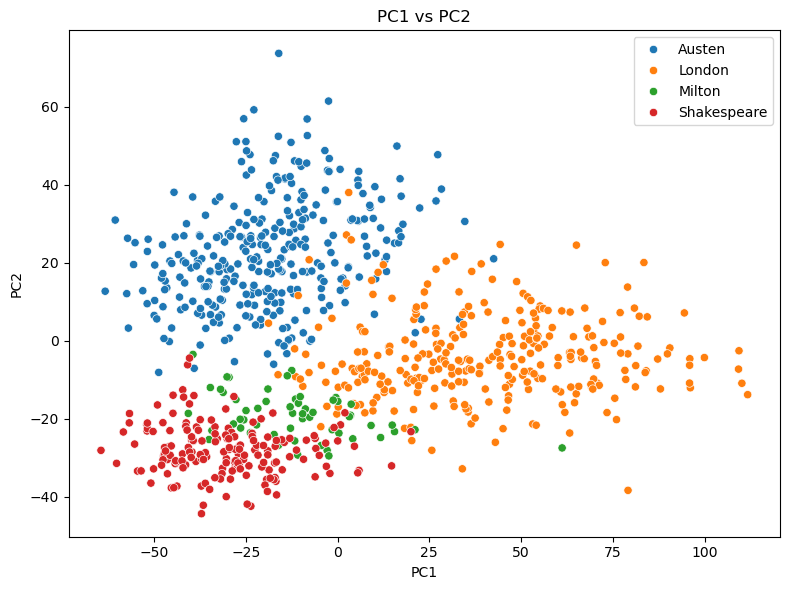

In [233]:
x, y = 'PC1', 'PC2' #adjust here

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df_with_author, x=x, y=y, hue='Author', palette='tab10', alpha=1)
plt.xlabel(x)
plt.ylabel(y)
plt.title(f'{x} vs {y}')
plt.legend(loc='upper right')
plt.tight_layout();


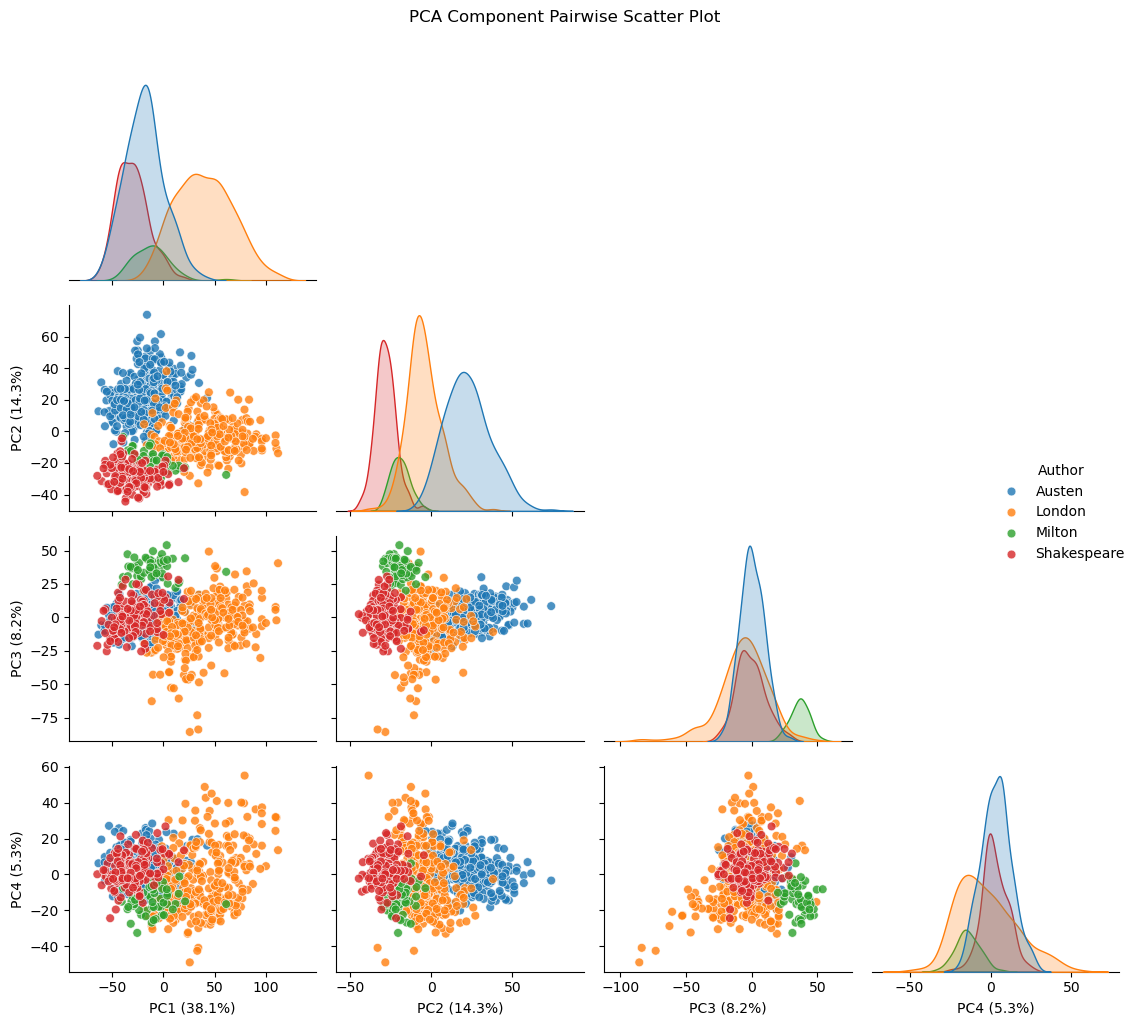

In [234]:
n = 4  # for PC1 to PC4
pca_subset = pca_df_with_author[[f'PC{i+1}' for i in range(n)] + ['Author']] # Extract top-n PCs with author labels
explained = pca.explained_variance_ratio_[:n] * 100
pca_subset.columns = [f'PC{i+1} ({explained[i]:.1f}%)' for i in range(n)] + ['Author']

sns.pairplot(pca_subset, hue='Author', palette='tab10', corner=True, plot_kws={'alpha':0.8, 's':40})
plt.suptitle('PCA Component Pairwise Scatter Plot', y=1.02)
plt.tight_layout()
plt.show()


### Clustering

In [235]:
#insert

### Pattern Recognition

In [236]:
#insert

### Validation

In [237]:
#insert